In [86]:
#GROUP 2 PROJECT

In [33]:
#Part 1: Explore Data Distribution
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
# Load the Ames Housing dataset
ames_data = pd.read_csv('ames.csv')

In [35]:
# Display basic information about the dataset
print(ames_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Summary statistics
summary_stats = ames_data[['SalePrice', 'TotRmsAbvGrd', 'OverallCond']].describe()
print(summary_stats)

           SalePrice  TotRmsAbvGrd  OverallCond
count    1460.000000   1460.000000  1460.000000
mean   180921.195890      6.517808     5.575342
std     79442.502883      1.625393     1.112799
min     34900.000000      2.000000     1.000000
25%    129975.000000      5.000000     5.000000
50%    163000.000000      6.000000     5.000000
75%    214000.000000      7.000000     6.000000
max    755000.000000     14.000000     9.000000


In [11]:
#Producing Visualizations

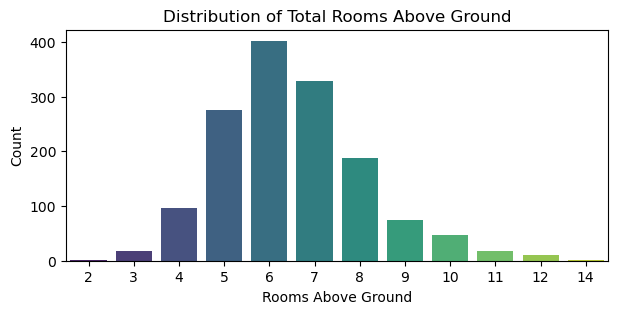

In [12]:
# Visualize 1: Distribution of TotRmsAbvGrd using a count plot
plt.figure(figsize=(7, 3))
sns.countplot(data=ames_data, x='TotRmsAbvGrd', palette='viridis')
plt.title('Distribution of Total Rooms Above Ground')
plt.xlabel('Rooms Above Ground')
plt.ylabel('Count')
plt.show()

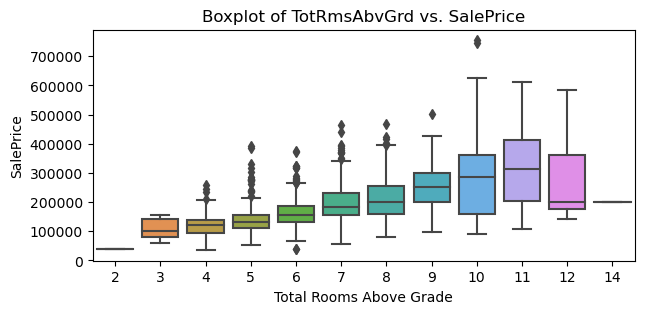

In [13]:
# Visulaization2: Boxplot of TotRmsAbvGrd Against Sales Price
plt.figure(figsize=(7, 3))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames_data)
plt.title('Boxplot of TotRmsAbvGrd vs. SalePrice')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('SalePrice')
plt.show()

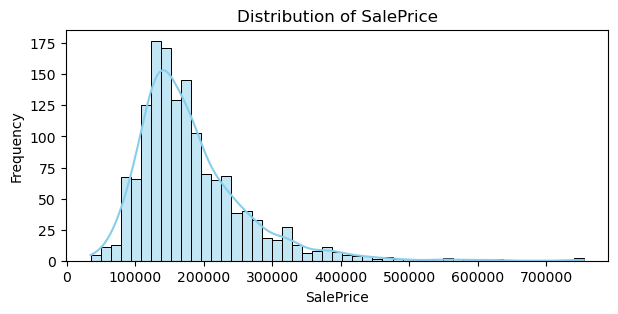

In [79]:
# Visualizion 3: Distribution of SalePrice using a histogram
plt.figure(figsize=(7, 3))
sns.histplot(ames_data['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

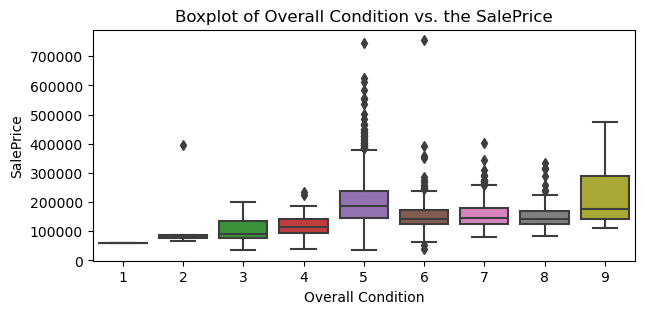

In [64]:
# Visulisation 4: Boxplot of OverallCond
plt.figure(figsize=(7, 3))
sns.boxplot(x='OverallCond', y='SalePrice', data=ames_data)
plt.title('Boxplot of Overall Condition vs. the SalePrice')
plt.xlabel('Overall Condition')
plt.ylabel('SalePrice')
plt.show()

In [25]:
#Interpretation of above visulaizations
#1.There is a positive correlation between the number of rooms above grade and Sale Price
#2.By looking at the SalesPrice histogram, we see that most houses have lower prices (in the range of 100-200K), but there are a few with very high prices.
#3. The houses that haaave higher overall condition tend to have higher prices.

In [39]:
#Part 2: Explore Differences between Subsets

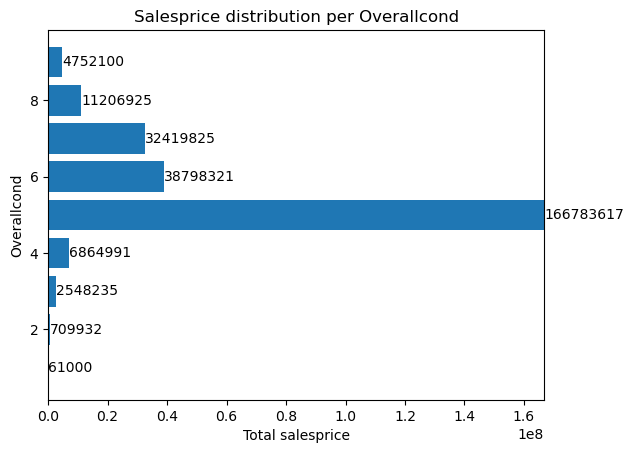

In [18]:
# Separate data into subsets based on Overall Condition
# Visualize the distribution of SalePrice for each subset
#Separate the data into subsets based on OverallCond, then demonstrate how this split impacts the distribution of SalePrice.
# Assuming df1 is your DataFrame
df1 = ames_data[['OverallCond', 'SalePrice']]
Ova_saleprice = df1[['OverallCond', 'SalePrice']]

Total_salesprice = {}
for i in Ova_saleprice['OverallCond'].unique():
    condition_values = Ova_saleprice.loc[Ova_saleprice['OverallCond'] == i, 'SalePrice'].tolist()
    Total_salesprice[i] = sum(condition_values)

sale_price = Total_salesprice.items()
Sorted_salesprice = sorted(sale_price, key=lambda x: x[0])
x = [item[0] for item in Sorted_salesprice]
y = [item[1] for item in Sorted_salesprice]

# plotting a horizontal bar plot for quantity against sales
fig, ax = plt.subplots()
bars = ax.barh(x, y)  # Use barh instead of bar
ax.set_xlabel('Total salesprice')
ax.set_ylabel('Overallcond')
ax.set_title('Salesprice distribution per Overallcond')

# Display values on the right of each bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center')

# Adjust y-axis and x-axis limits for horizontal bar plot
#ax.set_ylim(min(x) - 0.5, max(x) + 0.1)  # You can adjust the margins as needed
ax.set_xlim(0, max(y) + 10000)  # You can adjust the upper limit of x-axis as needed

plt.show()

In [ ]:
#Part 3: Explore Correlation

In [23]:
# Filter numerical columns
numeric_columns = ames_data.select_dtypes(include=['number']).columns
numeric_data = ames_data[numeric_columns]

In [71]:
# Calculate the vcorrelations
correlations = numeric_data.corr()

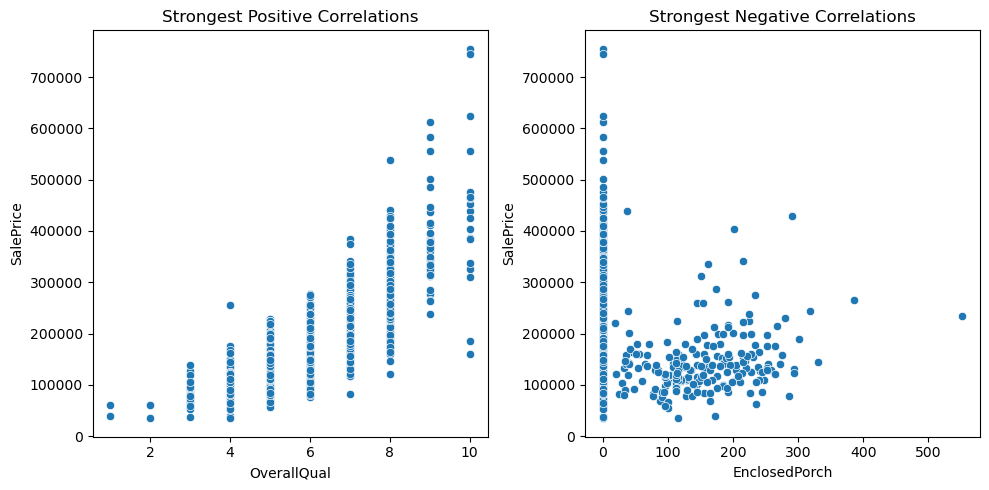

In [73]:
# Find features with the strongest positive and negative correlations with SalePrice
strongest_positive_corr = correlations['SalePrice'].sort_values(ascending=False).head(2)
strongest_negative_corr = correlations['SalePrice'].sort_values(ascending=True).head(2)

# Extract feature names
positive_corr_features = strongest_positive_corr.index.values[1:]  
negative_corr_features = strongest_negative_corr.index.values[1:] 

# Visualize relationships
plt.figure(figsize=(10, 5))

# Strongest positive correlation
plt.subplot(1, 2, 1)
for feature in positive_corr_features:
    sns.scatterplot(x=feature, y='SalePrice', data=numeric_data)
plt.title('Strongest Positive Correlations')

# Strongest negative correlation
plt.subplot(1, 2, 2)
for feature in negative_corr_features:
    sns.scatterplot(x=feature, y='SalePrice', data=numeric_data)
plt.title('Strongest Negative Correlations')

plt.tight_layout()
plt.show()


In [ ]:
#Heatmap

Strongest +ve Corr:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
Strong negative corr:


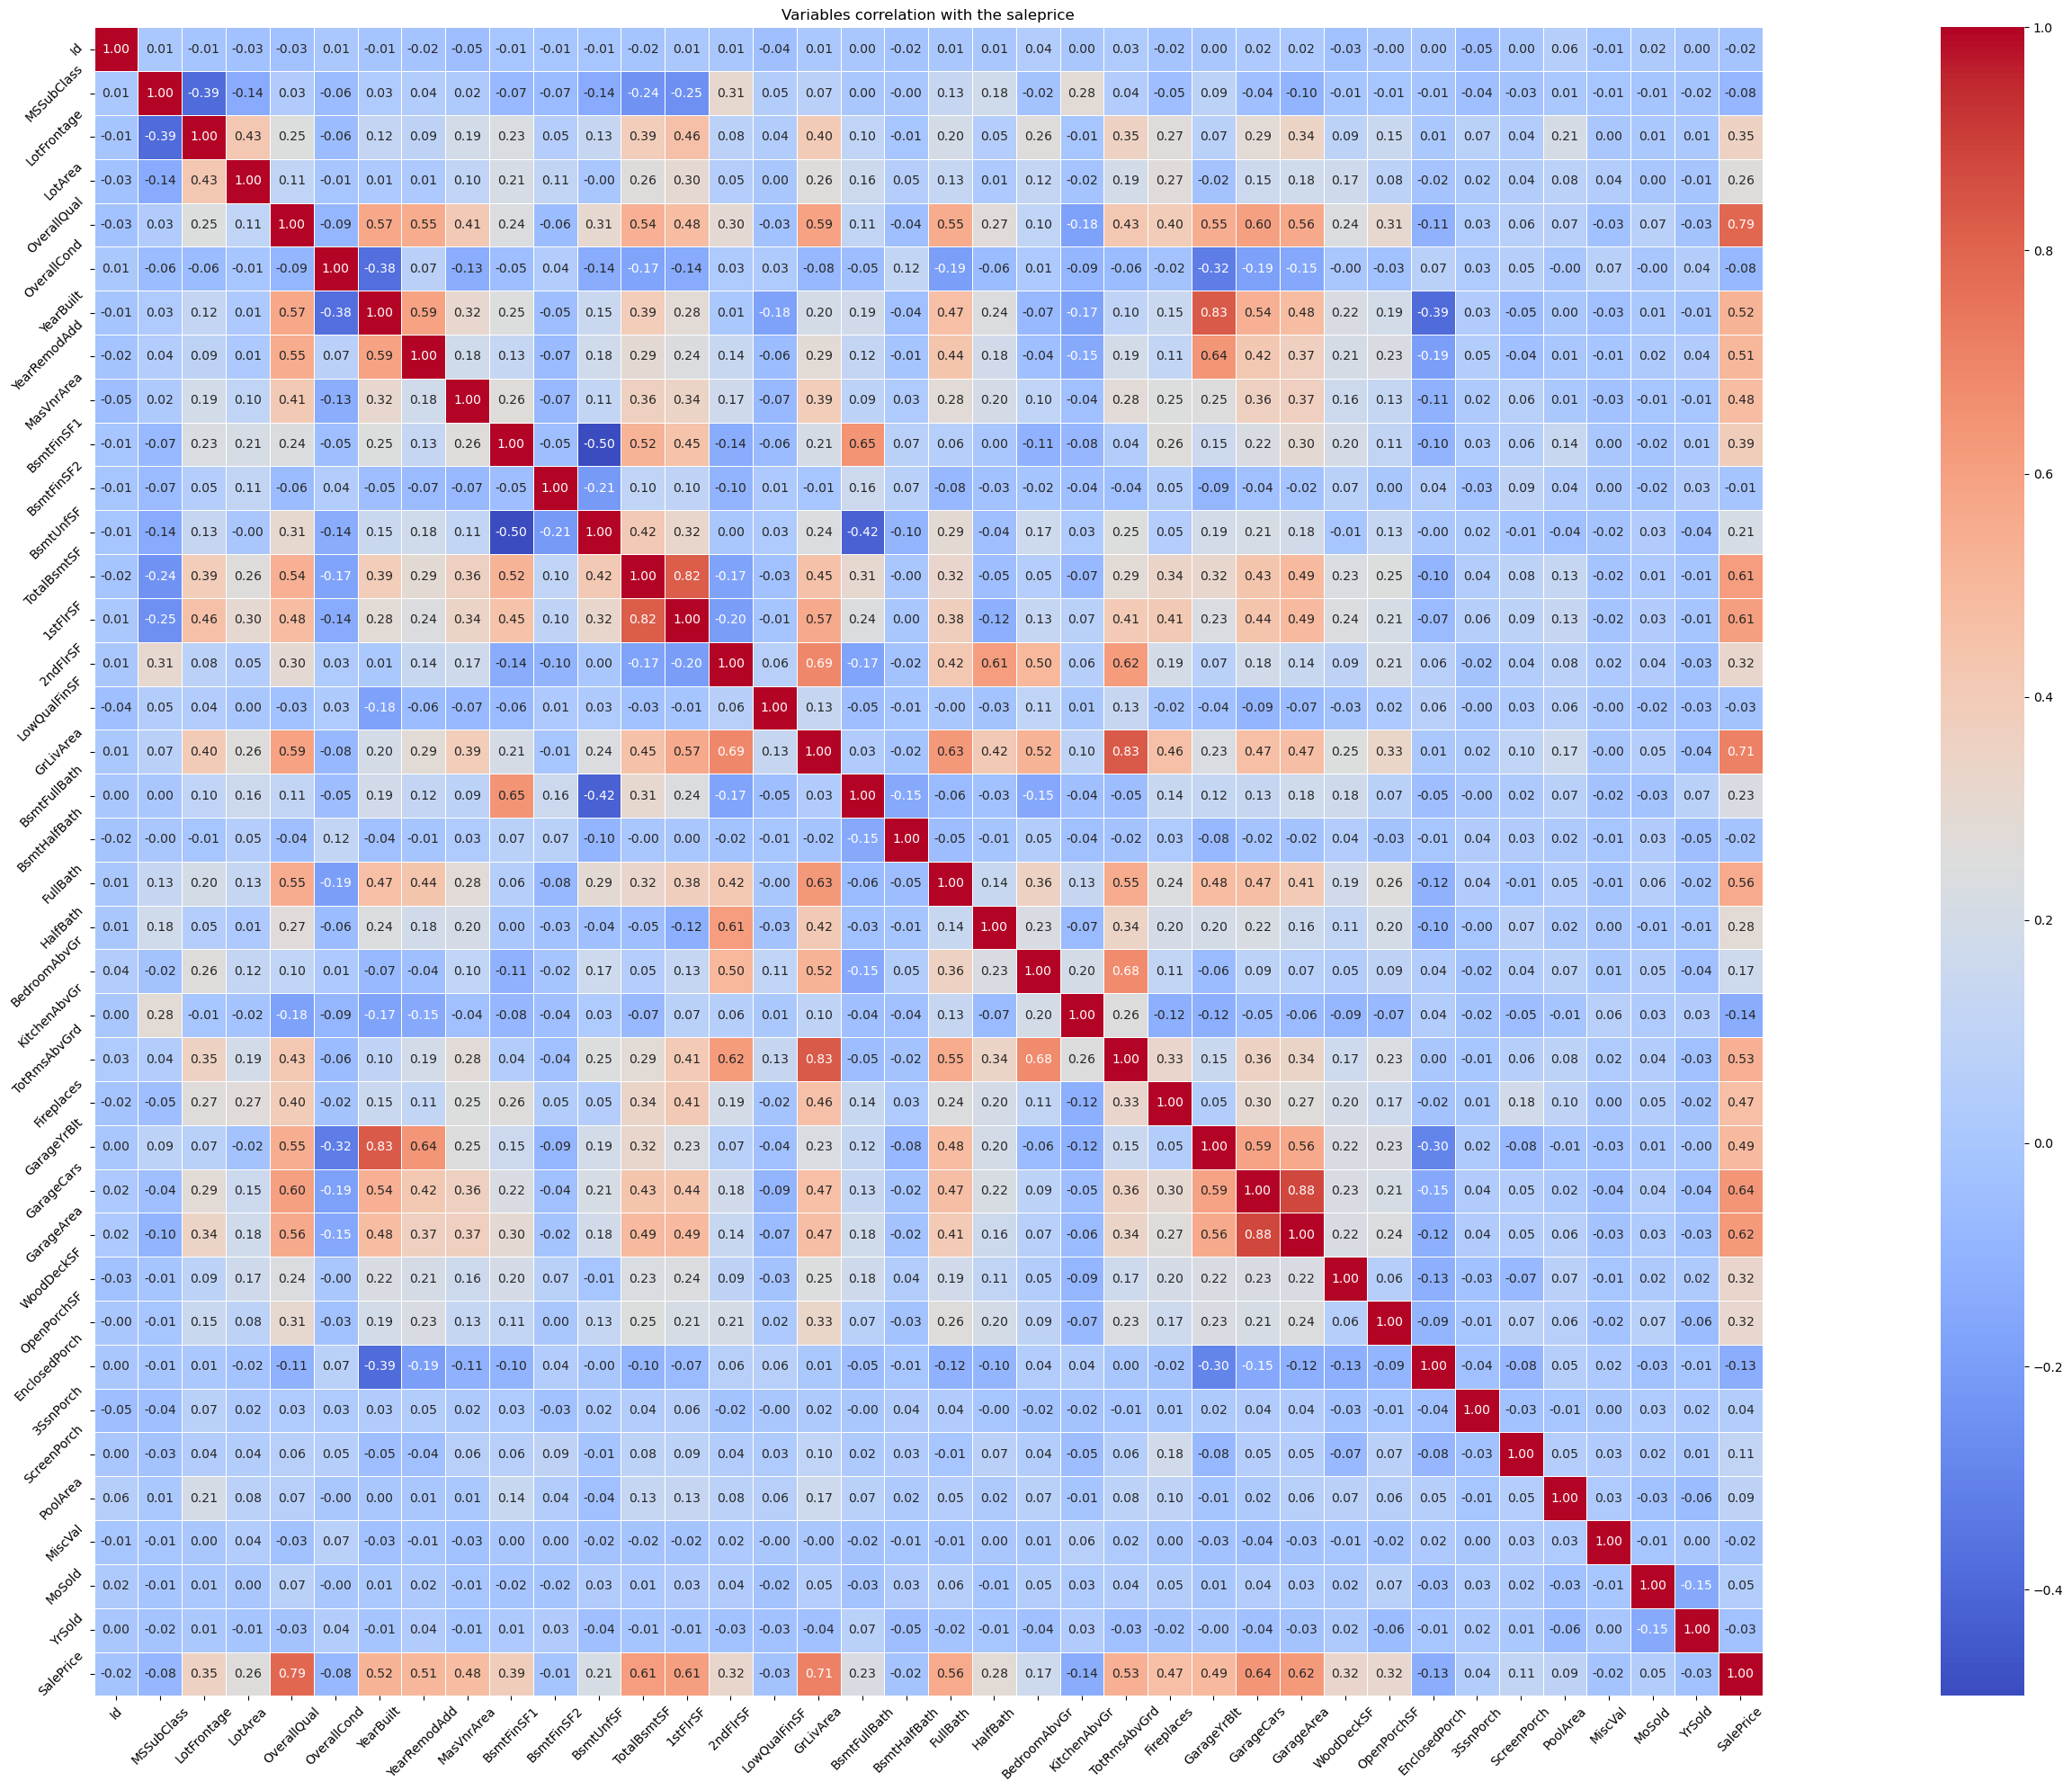

In [26]:
correlation_data = numeric_data.corr()
strongest_pos_corr_saleprice = correlation_data['SalePrice'].sort_values(ascending=False).head(5)
strongest_corr_neg_saleprice = correlation_data['SalePrice'].sort_values(ascending=True).head(5)

plt.figure(figsize=(40, 20))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

plt.title('Variables correlation with the saleprice')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
print('Strongest +ve Corr:')
print(strongest_pos_corr_saleprice)
print('Strong negative corr:')
plt.show()

In [ ]:
#Part 4: Engineer and Explore a New Feature

In [36]:
# Create a new feature 'Age'
ames_data['Age'] = ames_data['YrSold'] - ames_data['YearBuilt']

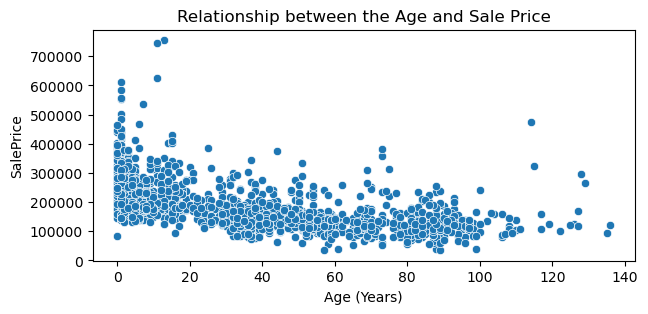

In [39]:
# Visualize the relationship between Age and SalePrice
plt.figure(figsize=(7, 3))
sns.scatterplot(x='Age', y='SalePrice', data=ames_data)
plt.title('Relationship between the Age and Sale Price')
plt.xlabel('Age (Years)')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
# Part 5: Visualizations of relevant findings

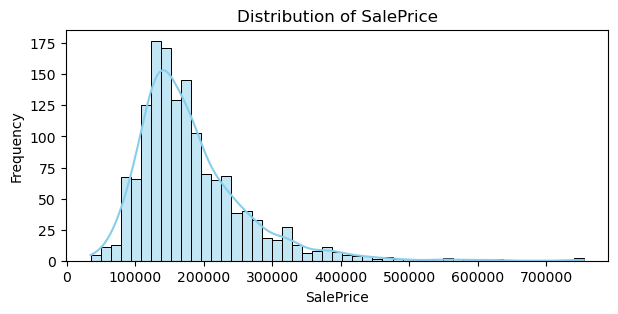

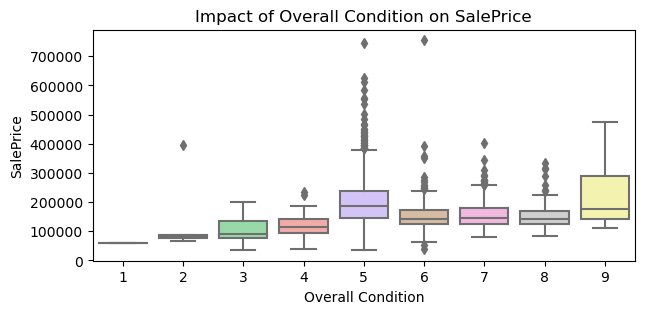

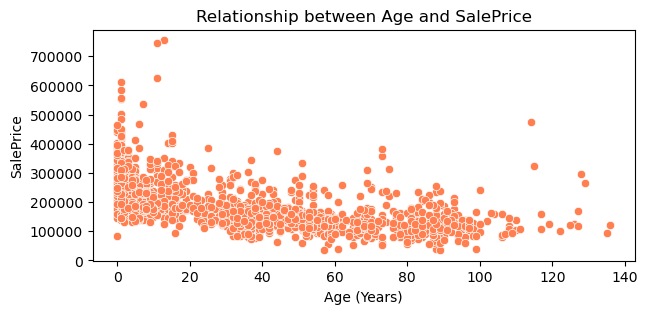

In [85]:
# Visualization 1: Distribution of SalePrice
plt.figure(figsize=(7, 3))
sns.histplot(ames_data['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Boxplot of SalePrice based on Overall Condition
plt.figure(figsize=(7, 3))
sns.boxplot(x='OverallCond', y='SalePrice', data=ames_data, palette='pastel')
plt.title('Impact of Overall Condition on SalePrice')
plt.xlabel('Overall Condition')
plt.ylabel('SalePrice')
plt.show()


# Visualization 3: Relationship between Age and SalePrice
# Create the Age feature
ames_data['Age'] = ames_data['YrSold'] - ames_data['YearBuilt']

plt.figure(figsize=(7, 3))
sns.scatterplot(x='Age', y='SalePrice', data=ames_data, color='coral')
plt.title('Relationship between Age and SalePrice')
plt.xlabel('Age (Years)')
plt.ylabel('SalePrice')
plt.show()
